# Practica examen parcial

### Pregunta 1
- Implementar una función en Python que calcule el máximo y el mínimo valor de un
arreglo de float.Retornar ambos valores en un arreglo.
- Implementar una función en C que calcule el máximo y el mínimo valor de un arreglo
de float. Retornar ambos valores en un arreglo.
- Haciendo uso de la librería de ctypes, realizar un análisis temporal de 50 iteraciones
probando sus funciones para un arreglo de N = 1024 elementos.
- Realizar el análisis temporal para N = 512, 1024, 2048, 4096 y 8192
- Responder qué implementación ha sido la más rápida
- Generar una gráfica SpeedUP y comentar acerca de la tendencia
- Responder, ¿cómo este ejemplo se relaciona con la ley de amdahl?
- Realizar lo mismo pero esta vez considerando un tipo de dato double.

In [1]:
import numpy as np
import ctypes

def find_max_min (arr_float):
    valor_maximo = float('-inf')
    valor_minimo = float('+inf')
    for numero in arr_float:
        if numero > valor_maximo:
            valor_maximo = numero
        if numero < valor_minimo:
            valor_minimo = numero

    arr_result = [valor_maximo, valor_minimo]

    return arr_result

In [2]:
find_max_min([2.1, 2.4, 2.6, 5.6, -4.6])

[5.6, -4.6]

In [3]:
%%file c_max_min.c
#include <stdio.h>
#include <float.h>
#include <stdlib.h>

float* calcular_max_min(float* arreglo, int cant_elementos){
    float* resultados = calloc(2, sizeof(float));
    resultados[0] = FLT_MIN;
    resultados[1] = FLT_MAX;

    for (int i = 0; i< cant_elementos; i++) {
        if (arreglo[i]> resultados[0]){
            resultados[0] = arreglo[i];
        }
        if (arreglo[i]< resultados[1]){
            resultados[1] = arreglo[i];
        }
    }
    return resultados;
}


Overwriting c_max_min.c


In [4]:
! gcc -c c_max_min.c -lm 

In [5]:
! gcc -shared c_max_min.o -o c_max_min.so

In [6]:
def c_types_max_min():
    # indicar ruta de la librería compartida
    libfile = './c_max_min.so'

    # cargar la libreria
    lib = ctypes.CDLL(libfile)

    # tipos de datos
    lib.calcular_max_min.argtypes = [
        np.ctypeslib.ndpointer(dtype=np.float32),
        ctypes.c_int
    ]
    lib.calcular_max_min.restype = np.ctypeslib.ndpointer(dtype=np.float32)

    # retornar función
    return lib.calcular_max_min

In [7]:
c_types_max_min_raw = c_types_max_min()

In [8]:
import time


def analizar_python():
    #creación del arreglo
    arreglo = np.random.uniform(-10, 10, size=8192).astype(np.float32)
    #analisis de la función en C
    tiempos_python = []
    for _ in range(50):
        inicio = time.time()
        find_max_min(arreglo)
        fin = time.time()
        tiempo_ejecucion = (fin - inicio) * 1000
        tiempos_python.append(tiempo_ejecucion)
    return tiempos_python


In [9]:
def analizar_c():
    arreglo_c = np.random.uniform(-10, 10, size=8192).astype(np.float32)
    tiempos_c = []
    for _ in range(50):
        inicio = time.time()
        c_types_max_min_raw(arreglo_c, 8192)
        fin = time.time()
        tiempo_ejecucion = (fin - inicio) * 1000
        tiempos_c.append(tiempo_ejecucion)
    return tiempos_c

In [10]:
t_python = analizar_python()
t_c = analizar_c()

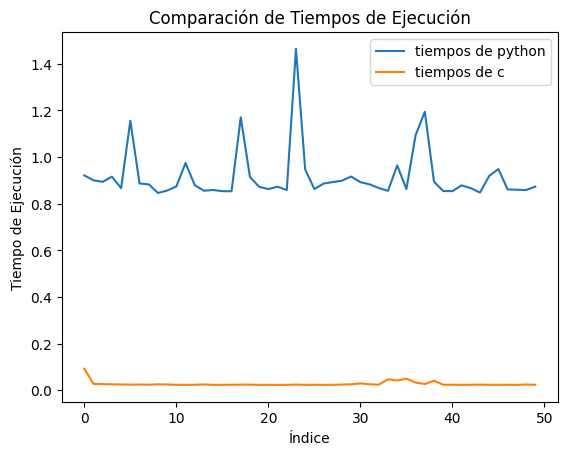

In [11]:
import matplotlib.pyplot as plt
#generar arreglo de numpy
t_python_arr = np.array(t_python)
t_c_arr = np.array(t_c)

#crear indices
indices = np.arange(len(t_python_arr))

#crear la figura
fig, ax = plt.subplots()

# Graficar los arreglos
ax.plot(indices, t_python_arr, label='tiempos de python')
ax.plot(indices, t_c_arr, label='tiempos de c')

# Configurar etiquetas de los ejes y título
ax.set_xlabel('Índice')
ax.set_ylabel('Tiempo de Ejecución')
ax.set_title('Comparación de Tiempos de Ejecución')
# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

#### De acuerdo a lo analizado en la gráfica podemos ver que los tiempos de ejecución en c son menores que los tiempos de ejecución en python, en ese sentido para calcular el speedup hacemos que la función optimizada sea la función en C y la función sin optimizar sea la función en python

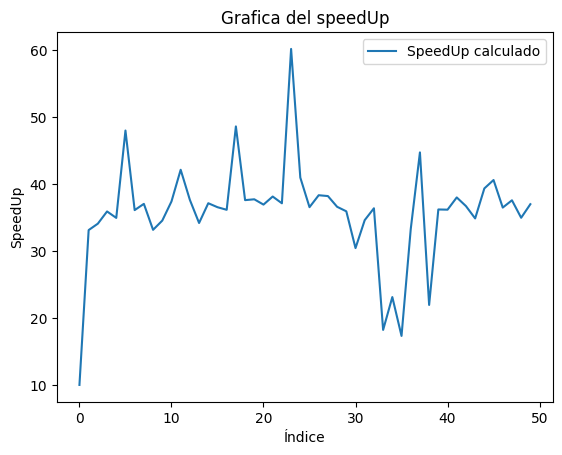

In [12]:
# Cálculo del speedUp
speedUp = t_python_arr/t_c_arr

# graficamos el speedup
# generamos arreglo en numpy
speedUp_arr = np.array(speedUp)

#Crear indices
indices_spu = np.arange(len(speedUp_arr))

#crear la figura
fig_sp, ax_spu = plt.subplots()

# Graficar los arreglos
ax_spu.plot(indices_spu, speedUp_arr, label='SpeedUp calculado')

# Configurar etiquetas de los ejes y título
ax_spu.set_xlabel('Índice')
ax_spu.set_ylabel('SpeedUp')
ax_spu.set_title('Grafica del speedUp')
# Mostrar leyenda
ax_spu.legend()

# Mostrar la gráfica
plt.show()

#### Comentario acerca de la tendencia:
##### Al inicio podemos ver que el speedUp es bastante grande, esto por la importante diferencia que encontramos en los tiempos de ejecución de las funciones, luego la tendencia va subiendo, lo que nos indica que de todas maneras existe una mejora importante en el rendimiento a mayor speedup mas rendimiento, al final es un factor.
### Como se relaciona con la ley de ahmdal:
#### En la ley de ahmdal es importante hablar acerca de las operaciones de coma flotante (floats) ya que depende de cuantas operaciones de coma flotante contenga un programa para a partir de este decir que se pueden ejecutar de forma paralela, con varios procesadores, en lugar de uno, si realizamos el analisis basado en esto, podemos decir que las funciones tienen una importante cantidad de operaciones de coma flotante que se pueden realizar en ejecución paralela.

## Pregunta 2
Investigar acerca de la implementación del algoritmo de Newton-Raphson para hallar raíces
n-esimas y realizar lo siguiente:
- Implementar una función en Python que calcule la media geométrica de un arreglo
de N elementos..
- Implementar una función en C que calcule la media geométrica de un arreglo de N
elementos..
- Validar sus funciones con un arreglo de 8 elementos. Comparar su resultado con la
función pow de Python. Recordar que debe hacer uso de la librería ctypes para
llamar a su función en C.
- Realizar un análisis temporal de 50 iteraciones probando sus funciones para un
arreglo de N = 1024 elementos.
- Realizar el análisis temporal para un arreglo de N = 16,32,64,128,256,512, 1024,
2048, 4096 y 8192. Considerar el tiempo de ejecución de pow como referencia.
- Responder qué implementación ha sido la más rápida.
- Generar una gráfica SpeedUP y comentar acerca de la tendencia

In [13]:
# Algoritmo de Newton-Raphson - Versión 1 : cuando es una función como tal
def newtonRaphson(fun, der, x_n, epsilon=1e-6, steps=50):   
    for n in range(steps + 1):
        # Evaluación de la función para ver si el resultado es válido
        f_x = fun(x_n)
        if abs(f_x) < epsilon:
            return x_n
        
        # Evaluación de la derivada
        d_f = der(x_n)
        if d_f == 0:
            print('Error la derivada es cero')
            return None
        
        # Estimación del siguiente punto
        x_n = x_n - f_x / d_f
    
    print('Se ha alcanzado el límite de iteraciones')
    return None

In [14]:
#Ejemplo de uso:
fun = lambda x: x**2 + 2*x - 8
der = lambda x: 2*x + 2
newtonRaphson(fun, der, 10, steps=10) # 2.0000001002152237

2.0000001002152237

In [15]:
#Algoritmo de Newton-Raphson - Versión 2: cuando es un valor numérico, obs: no tiene validaciones
def newton_raphson_raiz_nesima(x, n, epsilon=1e-6, max_iter=100):
    guess = 1.0

    for _ in range(max_iter):
        prev_guess = guess
        guess = guess - (guess ** n - x) / (n * (guess ** (n - 1)))
        
        if abs(guess - prev_guess) < epsilon:
            break
    
    return guess

In [16]:
#Ejemplo de uso:
raiz_cubica = newton_raphson_raiz_nesima(27, 3) # Salida: 3.0
print(raiz_cubica)

3.0000000000000977


#### Funciones que calculan la media geometrica

In [17]:
import math

def calcular_media_geometrica(arreglo):
    # Verificar si el arreglo está vacío
    if not arreglo:
        return None

    # Calcular el producto de todos los elementos del arreglo
    producto = 1.0
    for elemento in arreglo:
        producto *= elemento

    # Calcular la media geométrica
    media_geometrica = math.pow(producto, 1/len(arreglo))

    return media_geometrica


In [18]:
%%file c_media_geometrica.c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

double* calcular_media_geometrica(double* arreglo, int N) {
    // Verificar si el arreglo está vacío
    if (N == 0) {
        return NULL;
    }

    double producto = 1.0;
    for (int i = 0; i < N; i++) {
        producto *= arreglo[i];
    }

    double media_geometrica = pow(producto, 1.0 / N);

    // Crear un arreglo dinámico para almacenar la media geométrica
    double* resultado = (double*)malloc(sizeof(double));
    *resultado = media_geometrica;

    return resultado;
}

Overwriting c_media_geometrica.c


In [19]:
! gcc -c c_media_geometrica.c -lm 

In [20]:
! gcc -shared c_media_geometrica.o -o c_media_geometrica.so

In [21]:
def c_types_media_geometrica():
    # indicar ruta de la librería compartida
    libfile = './c_media_geometrica.so'

    # cargar la libreria
    lib = ctypes.CDLL(libfile)

    # tipos de datos
    lib.calcular_media_geometrica.argtypes = [
        np.ctypeslib.ndpointer(dtype=np.double),
        ctypes.c_int
    ]
    lib.calcular_media_geometrica.restype = np.ctypeslib.ndpointer(dtype=np.double)

    # retornar función
    return lib.calcular_media_geometrica

In [22]:
c_types_media_geometrica_raw = c_types_media_geometrica()

In [23]:

def analizar_c_media_geom():
    arreglo_c = np.random.uniform(-10, 10, size=8192).astype(np.double)
    tiempos_c = []
    for _ in range(50):
        inicio = time.time()
        c_types_media_geometrica_raw(arreglo_c, 8192)
        fin = time.time()
        tiempo_ejecucion = (fin - inicio) * 1000
        tiempos_c.append(tiempo_ejecucion)
    return tiempos_c

In [24]:
tiempos_c_media_geom = analizar_c_media_geom()

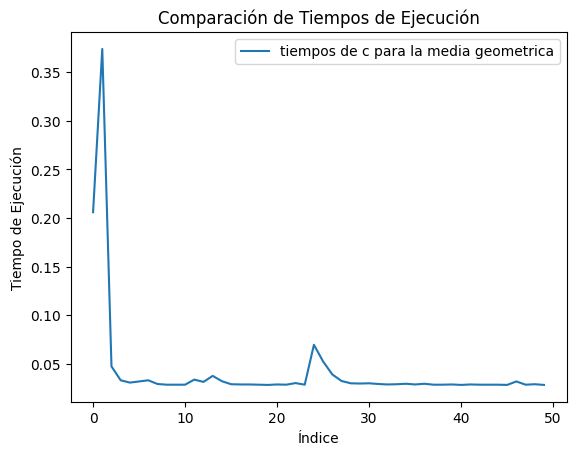

In [25]:
tiempos_c_media_geom_arr = np.array(tiempos_c_media_geom)

#crear indices
indices_c_med_geom = np.arange(len(tiempos_c_media_geom_arr))

#crear la figura
fig_c_med_geom, ax_c_med_geom = plt.subplots()

# Graficar los arreglos
ax_c_med_geom.plot(indices_c_med_geom, tiempos_c_media_geom_arr, label='tiempos de c para la media geometrica')

# Configurar etiquetas de los ejes y título
ax_c_med_geom.set_xlabel('Índice')
ax_c_med_geom.set_ylabel('Tiempo de Ejecución')
ax_c_med_geom.set_title('Comparación de Tiempos de Ejecución')
# Mostrar leyenda
ax_c_med_geom.legend()

# Mostrar la gráfica
plt.show()